In [ ]:
#Netflix Data Ananlysis
This project explores Netflix movies and Tv shows using Python. Libraries used: Pandas, NumPy, Matplotlib and Seaborn

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading dataset
df = pd.read_csv("netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
#Dataset Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.shape

(8807, 12)

In [11]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
#Data cleaning
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [15]:
df.drop_duplicates(inplace=True)

In [17]:
df['country'].fillna('Unknown' , inplace=True)
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)
df['director'].fillna('Unknown' , inplace=True)
df['cast'].fillna('Unknown' , inplace=True)
df['rating'].fillna('Unknown' , inplace=True)
df['duration'].fillna('Unknown' , inplace=True)

C:\Users\A\AppData\Local\Temp\ipykernel_14804\869701028.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown' , inplace=True)
C:\Users\A\AppData\Local\Temp\ipykernel_14804\869701028.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

C:\Users\A\AppData\Local\Temp\ipykernel_14804\1608359525.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


<function matplotlib.pyplot.show(close=None, block=None)>

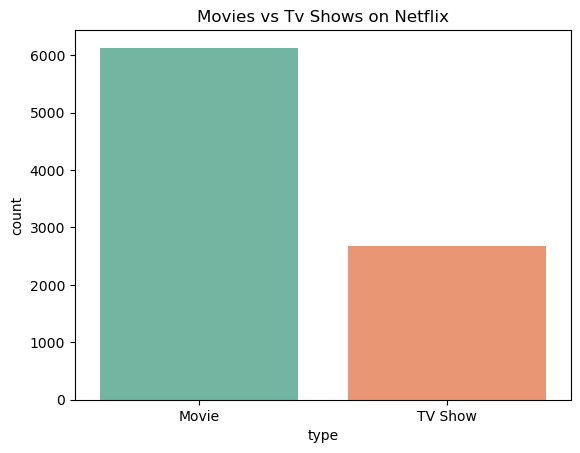

In [19]:
Movies vs TV shows
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Movies vs Tv Shows on Netflix")
plt.show

In [21]:
top_countries=df['country'].value_counts().head(10)
top_countries

country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

In [23]:
x = top_countries.values
x

array([2818,  972,  831,  419,  245,  199,  181,  145,  124,  110],
      dtype=int64)

In [25]:
y = top_countries.index
y

Index(['United States', 'India', 'Unknown', 'United Kingdom', 'Japan',
       'South Korea', 'Canada', 'Spain', 'France', 'Mexico'],
      dtype='object', name='country')

C:\Users\A\AppData\Local\Temp\ipykernel_14804\3080960828.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


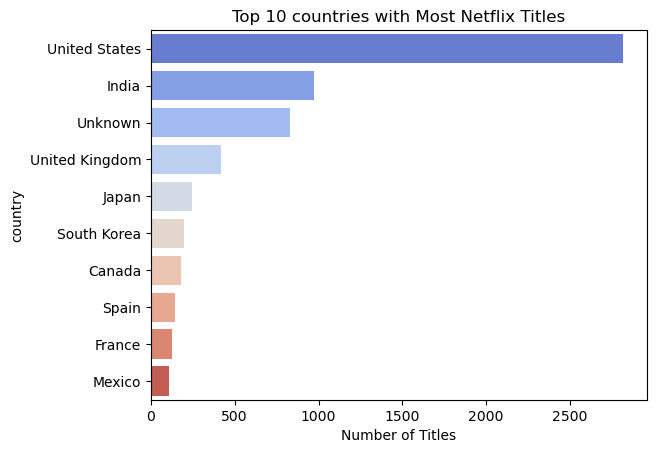

In [27]:
top_countries=df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 countries with Most Netflix Titles')
plt.xlabel("Number of Titles")
plt.show()

In [29]:
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y', errors='coerce')
df['release_year']

0      2020-01-01
1      2021-01-01
2      2021-01-01
3      2021-01-01
4      2021-01-01
          ...    
8802   2007-01-01
8803   2018-01-01
8804   2009-01-01
8805   2006-01-01
8806   2015-01-01
Name: release_year, Length: 8807, dtype: datetime64[ns]

In [31]:
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
df['year_added']

0       2021.0
1       2021.0
2       2021.0
3       2021.0
4       2021.0
         ...  
8802    2019.0
8803    2019.0
8804    2019.0
8805    2020.0
8806    2019.0
Name: year_added, Length: 8807, dtype: float64

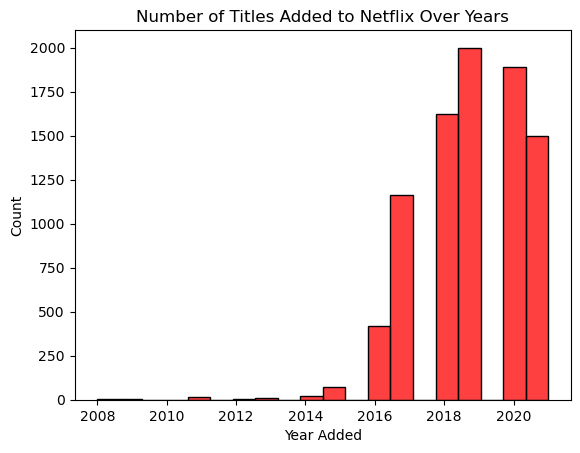

In [33]:
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y', errors='coerce')

df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year

sns.histplot(df['year_added'].dropna(), bins=20, kde=False, color='red')
plt.title('Number of Titles Added to Netflix Over Years')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.show()

C:\Users\A\AppData\Local\Temp\ipykernel_14804\2857679191.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


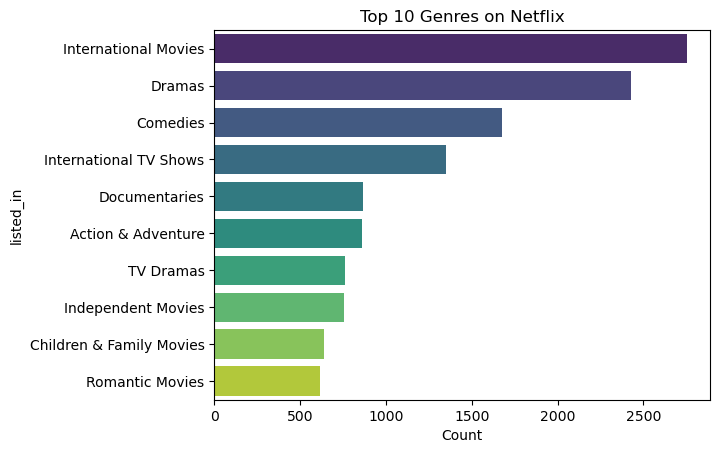

In [35]:
#genre distribution
genres = df['listed_in'].str.split(',').explode().str.strip()
top_genres = genres.value_counts().head(10)

sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.show()

In [42]:
#Movie Duration Analysis
movie_df = df[df['type'] == 'Movie'].copy()

movie_df['duration_num'] = (
    movie_df['duration']
    .str.replace('min', '', regex=False)
    .str.strip()
)
movie_df['duration_num'] = pd.to_numeric(movie_df['duration_num'], errors='coerce')


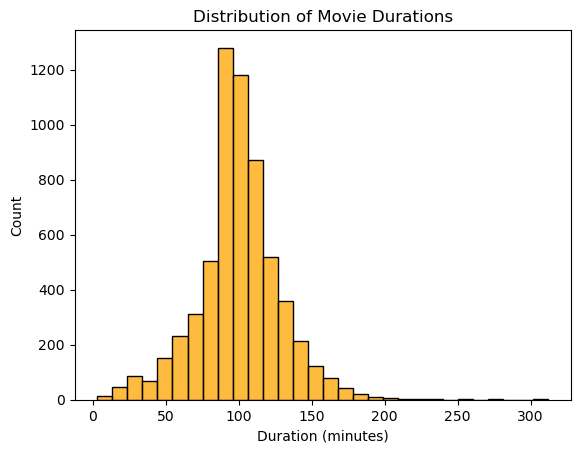

In [44]:
sns.histplot(movie_df['duration_num'].dropna(), bins=30, color='orange')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.show()


C:\Users\A\AppData\Local\Temp\ipykernel_14804\1078589500.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_directors.index,x=top_directors.values,palette='magma')


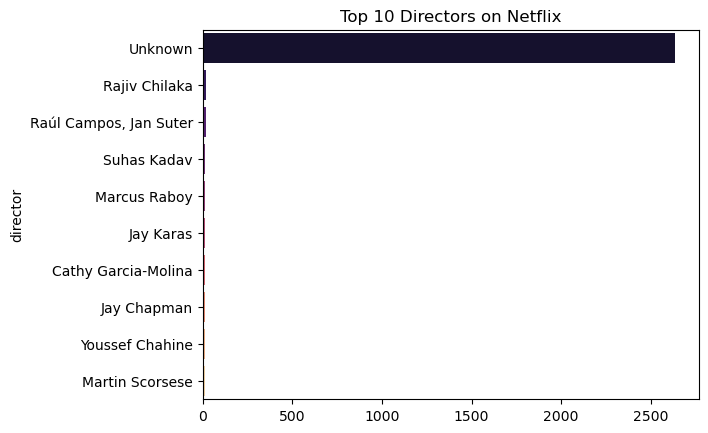

In [46]:
top_directors = df['director'].value_counts().head(10)
sns.barplot(y=top_directors.index,x=top_directors.values,palette='magma')
plt.title('Top 10 Directors on Netflix')
plt.show()

In [ ]:
## Key Insights
1. Movies dominate Netflix’s catalog, indicating a stronger focus on standalone content.
2. The United States and India are the leading content producers.
3. A significant increase in content addition is observed after 2015.
4. Drama is the most common genre on Netflix.
5. Most movies fall within the 90–120 minute duration range.

In [ ]:
## Conclusion
This exploratory data analysis provides insights into Netflix’s content
strategy by examining trends related to content type, genre popularity,
and production regions. The project demonstrates how data visualization
and analysis can transform raw data into meaningful business insights.